# Régression linéaire à plusieurs variables - Exercices tirés du MOOC d'Andrew Ng

## Chargement des données

Le jeu de données donne la valeur de plusieurs maisons, ainsi que leur taille (pieds carrés) et le nombre de chambres à coucher

### Chargez les données du fichier ex1data1.csv

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [224]:
data = pd.read_csv("ex1data2.csv")

### Visualisez les données (valeurs réelles)

Maintenant, nous avons deux 'features'. Voyez si elles ont le même ordre de grandeur

In [290]:
data.head(20)

,size,nb_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


## Définissez quelques variables utiles

### Définissez X et y

X est maintenant une matrice de dimensions m x 2

In [226]:
X = data.as_matrix(('size', 'nb_bedrooms'))
y = np.array(data.price)

### Initialisez theta (combien de dimensions?)

In [227]:
theta = np.zeros(3, dtype=float)

### Vérifiez les dimensions de theta et X. Sont-elles compatibles pour implémenter la fonction d'hypothèse?

In [228]:
X.shape

(47, 2)

In [229]:
theta.shape

(3,)

### Modifiez X en conséquence

In [230]:
X = data.as_matrix(('size', 'nb_bedrooms'))
vector = np.ones(47, dtype=float)
X =np.c_[vector, X]
X

array([[1.000e+00, 2.104e+03, 3.000e+00],
       [1.000e+00, 1.600e+03, 3.000e+00],
       [1.000e+00, 2.400e+03, 3.000e+00],
       [1.000e+00, 1.416e+03, 2.000e+00],
       [1.000e+00, 3.000e+03, 4.000e+00],
       [1.000e+00, 1.985e+03, 4.000e+00],
       [1.000e+00, 1.534e+03, 3.000e+00],
       [1.000e+00, 1.427e+03, 3.000e+00],
       [1.000e+00, 1.380e+03, 3.000e+00],
       [1.000e+00, 1.494e+03, 3.000e+00],
       [1.000e+00, 1.940e+03, 4.000e+00],
       [1.000e+00, 2.000e+03, 3.000e+00],
       [1.000e+00, 1.890e+03, 3.000e+00],
       [1.000e+00, 4.478e+03, 5.000e+00],
       [1.000e+00, 1.268e+03, 3.000e+00],
       [1.000e+00, 2.300e+03, 4.000e+00],
       [1.000e+00, 1.320e+03, 2.000e+00],
       [1.000e+00, 1.236e+03, 3.000e+00],
       [1.000e+00, 2.609e+03, 4.000e+00],
       [1.000e+00, 3.031e+03, 4.000e+00],
       [1.000e+00, 1.767e+03, 3.000e+00],
       [1.000e+00, 1.888e+03, 2.000e+00],
       [1.000e+00, 1.604e+03, 3.000e+00],
       [1.000e+00, 1.962e+03, 4.00

## Écrivez une fonction pour normaliser les features

In [231]:
def featureNormalize(X):
    mean = X.mean(axis=0)
    stdev = X.std(axis=0)
    X = (X - mean)/stdev
    return X, mean, stdev

In [232]:
X[:,1:], mean, stdev = featureNormalize(X[:,1:])
X

array([[ 1.00000000e+00,  1.31415422e-01, -2.26093368e-01],
       [ 1.00000000e+00, -5.09640698e-01, -2.26093368e-01],
       [ 1.00000000e+00,  5.07908699e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.43677059e-01, -1.55439190e+00],
       [ 1.00000000e+00,  1.27107075e+00,  1.10220517e+00],
       [ 1.00000000e+00, -1.99450507e-02,  1.10220517e+00],
       [ 1.00000000e+00, -5.93588523e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.29685755e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.89466782e-01, -2.26093368e-01],
       [ 1.00000000e+00, -6.44465993e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.71822042e-02,  1.10220517e+00],
       [ 1.00000000e+00, -8.65999486e-04, -2.26093368e-01],
       [ 1.00000000e+00, -1.40779041e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.15099326e+00,  2.43050370e+00],
       [ 1.00000000e+00, -9.31923697e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.80715024e-01,  1.10220517e+00],
       [ 1.00000000e+00, -8.65782986e-01

### Maintenant nous allons devoir adapter nos fonctions _predict_, _fit_, et _cost_ à une situation à plusieurs variables

In [233]:
print(theta)
def predict(X,theta):
    return(np.dot(X, theta))
predict(X, theta)

[0. 0. 0.]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [234]:
def cost(X, y, theta):
    return ((1/(2 * X.shape[0])) * (np.sum((predict(X, theta) - y)**2)))    

In [235]:


def fit_with_cost(X, y, theta, alpha, num_iters):
    J_history = []
    m = X.shape[0]
    
    # Boucler sur le nombre d'itérations
    for _ in range(num_iters):
        # Effectuer une itération de descente du gradient (i.e. on update theta une fois)
        theta = theta - (alpha/m) * np.dot((predict(X, theta) - y), X)
        #theta_story
        J_history.append(cost(X,y,theta))
    return theta, J_history

## Lancez l'entrainement du modèle

Vous êtes libres de choisir alpha et num_iters cette fois!

N'oubliez pas de récupérer la moyenne et l'écart-type calculés!

In [261]:
theta = np.zeros(3, dtype=float)
theta_fin, J_history_fin = fit_with_cost(X, y, theta, 0.001, 5000)
print(J_history_fin [-50::1], theta_fin)

[2065126622.2147112, 2065104167.328037, 2065081738.6629548, 2065059336.183464, 2065036959.8536217, 2065014609.6375444, 2064992285.4994042, 2064969987.4034302, 2064947715.31391, 2064925469.195187, 2064903249.0116632, 2064881054.727796, 2064858886.3080993, 2064836743.7171443, 2064814626.9195578, 2064792535.880025, 2064770470.5632863, 2064748430.934137, 2064726416.9574308, 2064704428.598077, 2064682465.8210387, 2064660528.5913377, 2064638616.874048, 2064616730.6343036, 2064594869.8372922, 2064573034.448254, 2064551224.432488, 2064529439.7553496, 2064507680.3822446, 2064485946.278638, 2064464237.4100468, 2064442553.7420459, 2064420895.2402625, 2064399261.8703792, 2064377653.5981328, 2064356070.3893154, 2064334512.2097743, 2064312979.0254068, 2064291470.80217, 2064269987.5060706, 2064248529.1031723, 2064227095.559591, 2064205686.8414965, 2064184302.9151137, 2064162943.746718, 2064141609.3026414, 2064120299.5492687, 2064099014.4530365, 2064077753.9804363, 2064056518.0980117] [ 3.38124708e+05

## Visualisez l'évolution du coût (graphe de convergence)

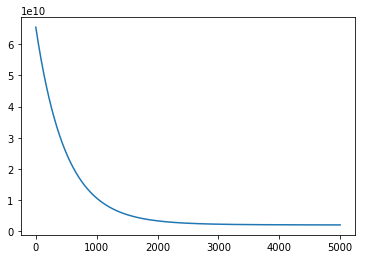

In [262]:
fit = plt.figure()
ax = plt.axes()
ax.plot(J_history_fin)

## Testez votre modèle

Que vaut une maison de 1650 pieds carrés et de 3 chambres à coucher? (Si la valeur est aberrante, vous avez peut-être oublié une étape...)

In [293]:
X_test = (np.array([1650,3]) - mean)/stdev
X_test = np.hstack([1, X_test])

In [294]:
predict(X_test,theta_fin)

292220.526726964